In [9]:
# !pip install -r ../requirements.txt

In [10]:
# import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv('../data/final_preprocessed_data_points.csv')
print(data.shape)
data.head(2)

(219, 23)


,_id,image_url,brands,pnns_groups_2,energy-kj_100g,sugars_100g,salt_100g,saturated-fat_100g,proteins_100g,fiber_100g,...,nutrition_grade_fr,negative_points,positive_points,energy_points,sugars_points,sodium_points,saturated_fat_points,fruit_points,fiber_points,proteins_points
0,3.251492e+12,https://images.openfoodfacts.org/images/produc...,Gerblé,Biscuits and cakes,1817.0,21.0,0.00,1.3,9.4,6.4,...,b,10.0,10.0,5,4,0,1,0,5,5
1,3.175680e+12,https://images.openfoodfacts.org/images/produc...,Gerblé,Biscuits and cakes,1961.0,17.0,0.38,2.0,10.0,4.6,...,b,10.0,9.0,5,3,0,1,0,4,5


# define the Machine learning algorithms both supervised and unsupervised 

In [12]:
def AnotherMethodNutriScore(data):

    # Initialize classifiers
    classifiers = {
        'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0),
        'Random Forest': RandomForestClassifier(max_depth=5, random_state=0),
        'Logistic Regression': LogisticRegression(),
        'Gaussian Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=15)
    }

    le = preprocessing.LabelEncoder()
    le.fit(["a", "b", "c", "d", "e"])
    y_train = le.transform(data[['nutrition_grade_fr']])

    # Select columns of interests
    columns_of_interest = ['energy-kj_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g',
                        'proteins_100g', 'fiber_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'sodium_100g']

    X_train = data.iloc[:,4:11]

    # Fit classifiers and store predicted values for each sample
    # for clf_name, clf in classifiers.items():
    #     clf.fit(X_train, y_train)
    #     y_pred = clf.predict(X_train)
    #     data[f'{clf_name}_predicted'] = le.inverse_transform(y_pred)  

    # Assuming X_train, y_train, le, and classifiers are defined as before
    # Splitting data for visualization purposes
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Initialize an empty dictionary to store accuracy results
    accuracy_results = {}

    # Function to plot confusion matrix
    def plot_and_save_confusion_matrix(true_values, predicted_values, classifier_name, ax):
        true_values_encoded = le.transform(true_values)
        predicted_values_encoded = le.transform(predicted_values)
        
        cm = confusion_matrix(true_values_encoded, predicted_values_encoded)
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

        # Set x and y tick labels using LabelEncoder's inverse_transform
        ax.set_xticklabels(le.inverse_transform(range(len(cm))))
        ax.set_yticklabels(le.inverse_transform(range(len(cm))))

        ax.set_title(f'Confusion Matrix for {classifier_name}')
        ax.set_xlabel('Predicted Score')
        ax.set_ylabel('Actual Score')

    # Calculate number of rows and columns needed for subplots
    num_classifiers = len(classifiers)
    num_rows = 2  # 2 rows
    num_cols = (num_classifiers + 1) // num_rows  # Adjusted columns to fit all classifiers

    # Create subplots dynamically
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    # Flatten axes if it's not a 2D array
    if num_classifiers == 1:
        axes = [axes]

    # Iterate through classifiers and plot confusion matrices
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        clf.fit(X_train_split, y_train_split)
        y_pred = clf.predict(X_test_split)
        accuracy = accuracy_score(y_test_split, y_pred)
        accuracy_results[clf_name] = accuracy

        # Plot confusion matrix in subplots
        plot_and_save_confusion_matrix(le.inverse_transform(y_test_split), le.inverse_transform(y_pred), clf_name, axes[i // num_cols][i % num_cols])

    # Hide empty subplots if there are fewer classifiers than columns
    for i in range(num_classifiers, num_rows * num_cols):
        axes[i // num_cols][i % num_cols].axis('off')

    # Adjust layout
    plt.tight_layout()  # Adjust bottom padding for the second row
    plt.show()

    res = pd.DataFrame(list(accuracy_results.items()), columns=['Classifier', 'Accuracy'])

    # Create a bar plot using seaborn with annotations
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x='Classifier', y='Accuracy', data=res, palette='viridis')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of Classifiers')
    plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy values
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

    # Add annotations for accuracy values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

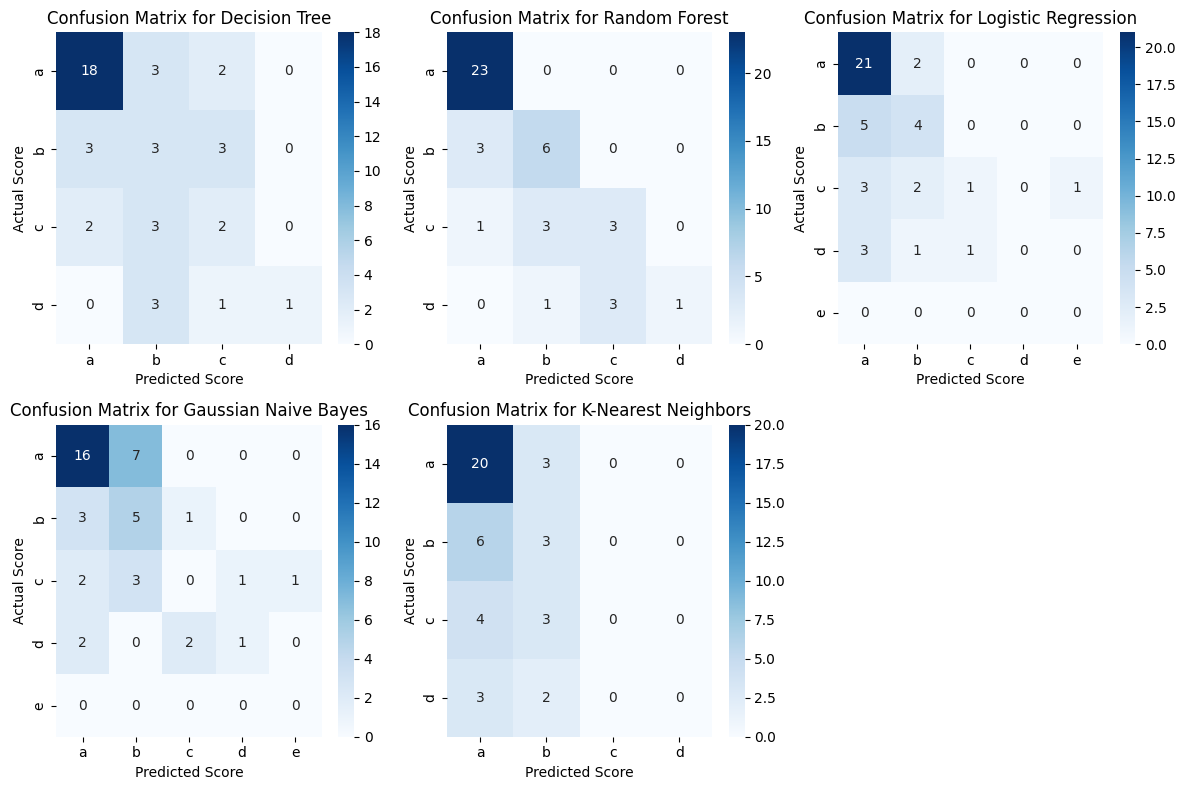

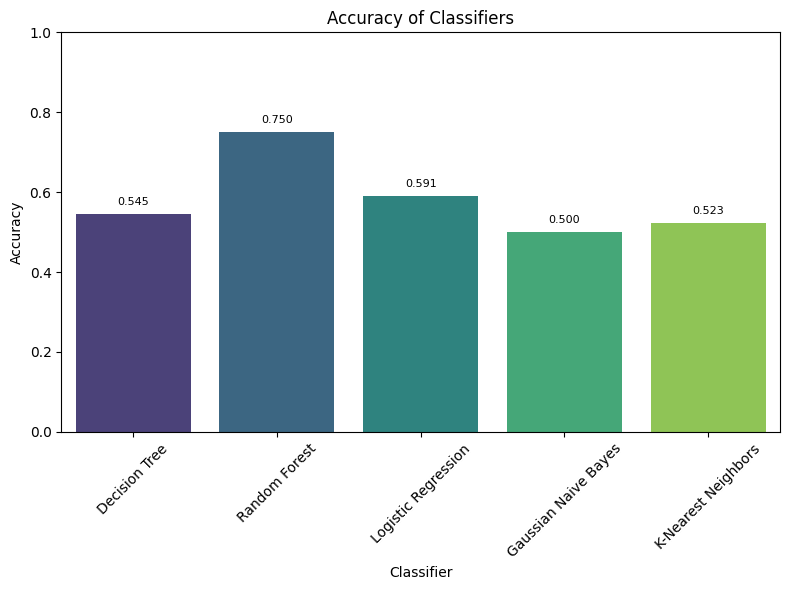

In [13]:
AnotherMethodNutriScore(data)